<a href="https://colab.research.google.com/github/abuisrar8/ANDROID_Age_in_Minutes/blob/master/Essay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/train.csv')
Samp=data.head()
Samp

essay_id                                          full_text  score
0  000d118  Many people have car where they live. The thin...      3
1  000fe60  I am a scientist at NASA that is discussing th...      3
2  001ab80  People always wish they had the same technolog...      4
3  001bdc0  We all heard about Venus, the planet without a...      4
4  002ba53  Dear, State Senator\n\nThis is a letter to arg...      3

In [ ]:
data['full_text']

0        Many people have car where they live. The thin...
1        I am a scientist at NASA that is discussing th...
2        People always wish they had the same technolog...
3        We all heard about Venus, the planet without a...
4        Dear, State Senator\n\nThis is a letter to arg...
                               ...                        
17302    the story " The Challenge of Exploing Venus " ...
17303    Technology has changed a lot of ways that we l...
17304    If you don't like sitting around all day than ...
17305    In "The Challenge of Exporing Venus," the auth...
17306    Venus is worthy place to study but dangerous. ...
Name: full_text, Length: 17307, dtype: object

In [ ]:
data.shape

(17307, 3)

In [ ]:

print(data.columns.to_list())


['essay_id', 'full_text', 'score']


In [ ]:
data.isna().sum()

essay_id     0
full_text    0
score        0
dtype: int64

<Axes: xlabel='score'>

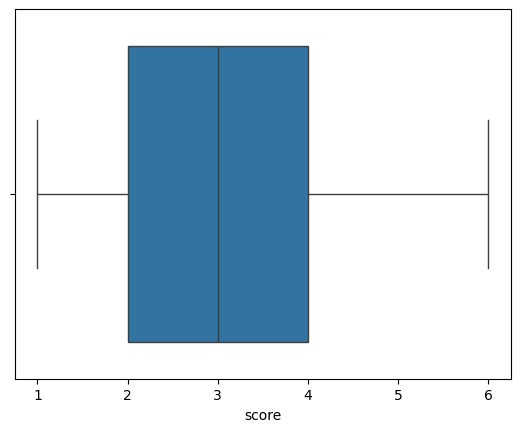

In [ ]:
sns.boxplot(x=data['score'])


In [ ]:
data.score.unique()

array([3, 4, 2, 1, 5, 6])

In [ ]:
from collections import Counter

full_text = data['full_text'].str.lower()
words = full_text.str.split()
words = [word for sublist in words for word in sublist]

word_counts = Counter(words)
for word, count in word_counts.most_common(15):
  print(f"{word}: {count}")


the: 364194
to: 205629
a: 155713
and: 144725
of: 138810
is: 112052
that: 110136
in: 107621
it: 88605
be: 71077
are: 59060
for: 56338
on: 55970
you: 54717
they: 52365


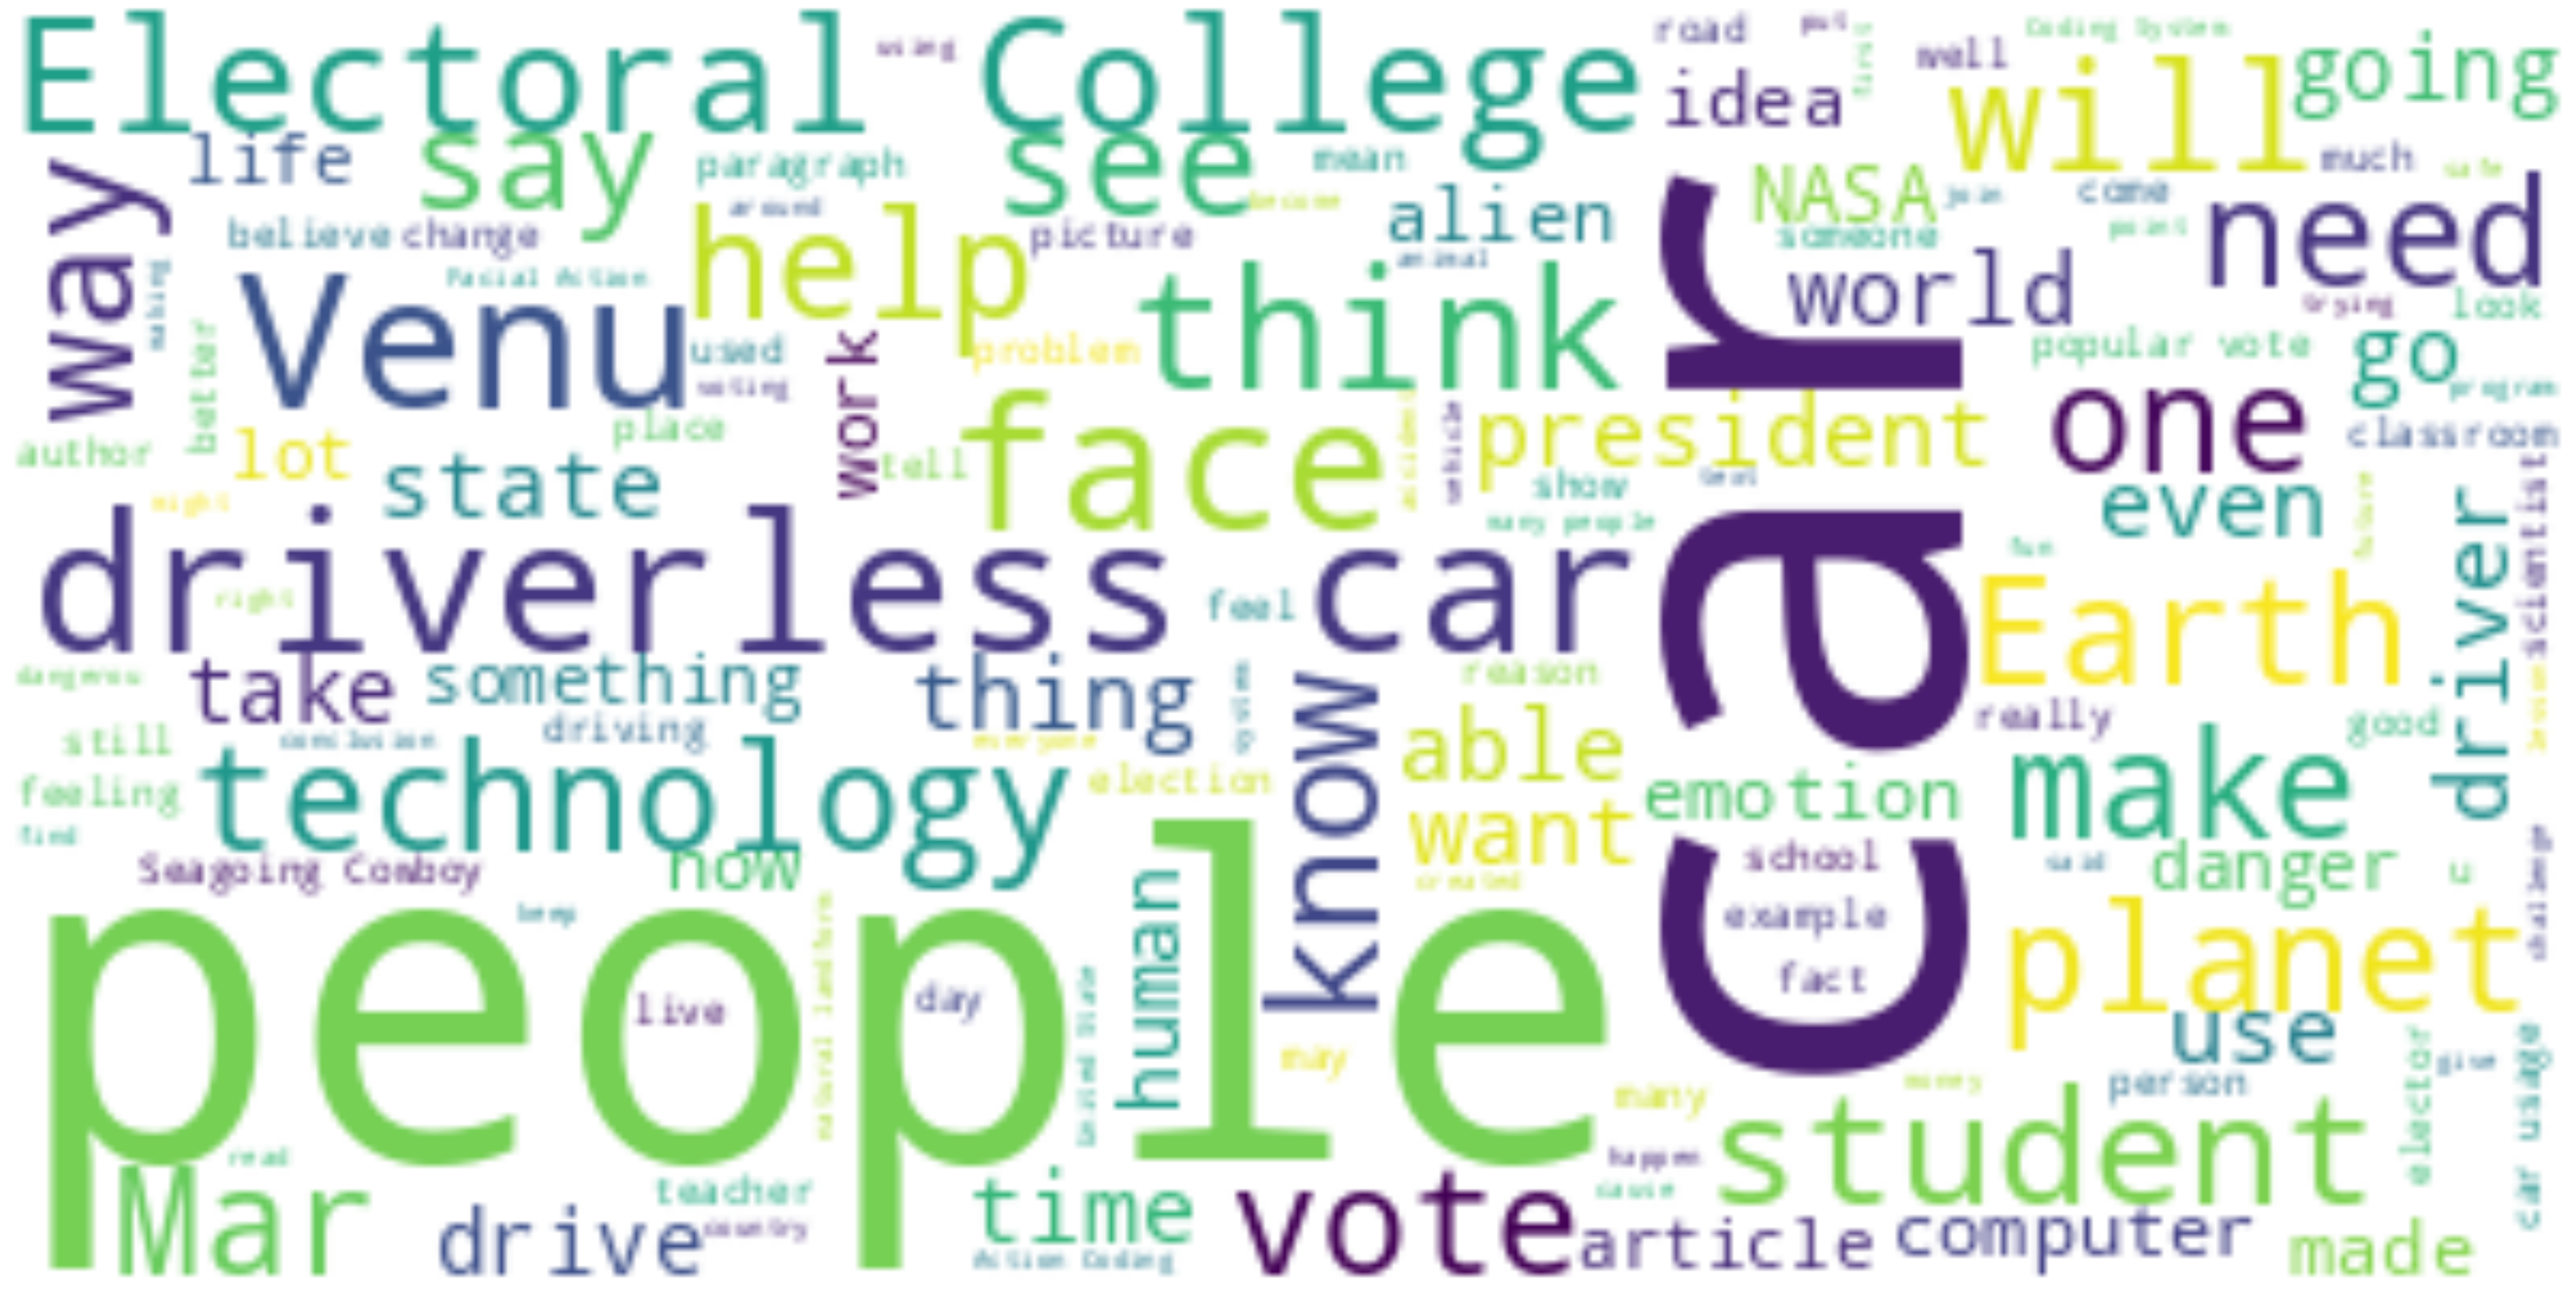

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(data["full_text"].tolist())

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure(figsize=(80, 80))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
data.isnull().sum()

essay_id     0
full_text    0
score        0
dtype: int64

In [ ]:
# Checking how many unique essay id were given and whether all of them are unique
print("Unique", "All", "  All are unique\n", data['essay_id'].nunique(), data['essay_id'].size, data['essay_id'].nunique() == data['essay_id'].size)


Unique All   All are unique
 17307 17307 True


In [ ]:
# Counting the frequency of each score given

print(data.groupby('score').size())

score
1    1252
2    4723
3    6280
4    3926
5     970
6     156
dtype: int64


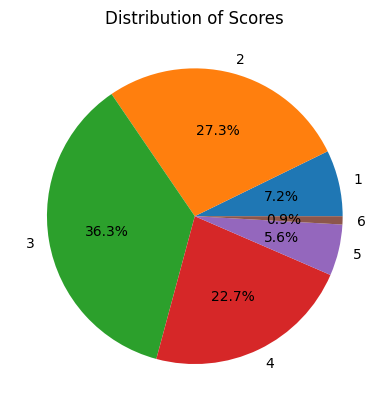

In [ ]:
data.groupby('score').size().plot.pie(autopct='%1.1f%%', startangle=0)

plt.title('Distribution of Scores')

plt.show()